# The Idea

Given a dataset, we would like to estimate some unknown quantity, which is manifested as an underlying pattern in the data.

For instance, say we are given a dataset containing the outcomes of flipping a coin 1000 times, presented as a sequence of heads and tails ($\{H, H, T, H, T, T, H, ..., H\}$).  We would like to use this sequence to estimate, for all subsequent flips, the probability of landing on heads.  Certainly, if the dataset contained far more heads than tails (say, 995 heads and 5 tails), then it would be fair to assume that the coin was unfair.  But, _exactly how unfair_ is the coin?  What is our best estimate for the subsequent chance of obtaining heads ($99.5\%$? $90\%$?)?  If we are [betting money](http://www.smithsonianmag.com/science-nature/gamblers-take-note-the-odds-in-a-coin-flip-arent-quite-5050-145465423/?no-ist), we should also know how much should we trust our prediction!  If an honest friend told us the coin was fair (or, had a $50\%$ chance of landing heads) before we saw the dataset, then how safe is it to believe, after viewing the dataset, that the coin is fair (and the dataset just represents a bad run)?  Maybe it's safer, in this case, to think that our friend had good intentions, but the coin was slightly damaged without his knowledge, and the true chance of heads is more like $70\%$?

Thankfully, there exists a mathematical framework to help with these kinds of questions.  We provide a general discussion below and keep the development of the coin flip example confined to the indented boxes.

# Setup

Assume that any dataset $D = \{x_1, \ldots, x_n\}$ arises as an [i.i.d.](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) sample from some unknown probability distribution $q$.  That is, each $x_i$ is a realization of a random variable $X_i$, where $X_i \sim q$ and $X_i \perp\!\!\!\perp X_j$ for $i \neq j$.

> In the case of the coin-flipping dataset, the outcome of the $i$th coin flip $x_i$ is viewed as a realization of a random variable $X_i$, where $x_i \in \{H, T\}$ for $i \in \{1, \ldots, 1000\}$.  As described below, the unknown distribution $q$ contains all of the information that we need about the probability of the coin landing heads.

Suppose we have enough information to specify a (generally infinite) family of probability distributions that is likely to contain $q$ (or, a close-enough approximation for $q$).  We represent this family as a collection $\{p(\cdot|\theta), \theta \in \Theta\}$, where each value for $\theta$ specifies a different probability distribution.  Put loosely, would like to find the best value of $\theta$, denoted $\hat{\theta}$, that produces the distribution that is "closest" to $q$.  That is, (_even more loosely!_) we want to find $\hat{\theta}$ such that $p(x_i|\hat{\theta}) \approx q(x_i)$.  Thankfully, we can make the notion of "closeness" more concrete in subsequent sections.  It is important to note that it is _impossible_ to get the true underlying value of $q(x_i)$ from a finite collection of data.  However, we should be able to get a good approximation, as long as the dataset is large enough!

> Since there are only two possible outcomes for each random variable $X_i$, we must have that $q$ is a [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) distribution.  Thus, the $q$ must be an element in the collection $\{\text{Bernoulli}(\theta), \theta \in [0,1]\}$.  We can write that for all $i \in \{1, \ldots, 1000\}$,
$$
p(H|\hat{\theta}) = \hat{\theta} \approx \mathbb{P}(X_i = H) = q(H),
$$
and so $\hat{\theta}$ represents our estimate for the true probability of obtaining heads, which is our quantity of interest.

# Intuitive Approaches

We can sometimes use the dataset to rule out some values for $\hat{\theta} \in \Theta$.

> If the dataset is neither all tails nor all heads, then we should have that $\hat{\theta} \notin \{0,1\}$.  

Likewise, it should follow that the dataset provides information to make some potential values for $\hat{\theta}$ more likely than others.  Perhaps it makes sense to pick the value that is most likely for our particular dataset!  This idea corresponds to choosing what is known as the [**maximum a posteriori probability (MAP) estimate**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) $\theta_{MAP}$ for $\hat{\theta}$.

$$
\theta_{MAP} := \arg\max_{\theta} \mathbb{P}(\theta|D)
$$

> Say we are trying to determine the feasibility of $\hat{\theta} = .99$.  This is more likely if the dataset is mostly heads, and less likely (but still possible!) if the dataset is mostly tails.  

> Here, it makes sense to think of $\mathbb{P}(\theta|D)$ as a single probability mass function over $\theta \in [0,1]$, which we are trying to maximize.


Now, as a slight reframing of mindset (which will prove useful), consider that each possible value of $\hat{\theta}$ induces a probability distribution on the set of all (hypothetical) datasets.  Perhaps it makes sense to evaluate each of these distributions at our realized dataset and keep the value of $\hat{\theta}$ corresponding to the distribution that evaluates our dataset as having the highest probability.  This idea corresponds to what is known as [**maximum likelihood estimation (MLE)**](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation), which produces an estimate $\theta_{MLE}$ for $\hat{\theta}$.

$$
\theta_{MLE} := \arg\max_\theta \mathbb{P}(D|\theta)
$$

> Each possible value of $\hat{\theta} \in [0,1]$ induces a probability distribution on the set of all $2^{1000}$ possible datasets (collection of potential outcomes from throwing the coin 1000 times), with no value of $\hat{\theta}$ producing a probability distribution that is uniform over the set of all possible datasets. 

> Here, it makes sense to think of $\{\mathbb{P}(\cdot|\theta): \theta\in\Theta\}$ as an uncountably infinite (with cardinality equal to $[0,1]$) collection of probability distributions over the set of all $2^{1000}$ possible coin-flip datasets.  Then $\{\mathbb{P}(D|\theta): \theta\in\Theta\}$ is a countably infinite collection of real values, and we seek the value(s) indexing the maximum/maxima.

# MAP vs. MLE

It is not clear how to calculate $\mathbb{P}(\theta|D)$ without the use of Bayes' Rule.  Thus, we will need to calculate

$$
\mathbb{P}(\theta|D) = \frac{\mathbb{P}(D|\theta)\mathbb{P}(\theta)}{\mathbb{P}(D)} = \frac{\mathbb{P}(D|\theta)\mathbb{P}(\theta)}{\int_{\Theta} \mathbb{P}(D|\theta)\mathbb{P}(\theta) d\theta}.
$$

Note that since the sample is i.i.d., we can write
$$
\mathbb{P}(D|\theta) = \mathbb{P}(X_1 = x_1, \ldots, X_n = x_n|\theta) = \prod_{i=1}^n p(x_i|\theta).
$$

Taking note of the term $\mathbb{P}(\theta)$, we see that MAP estimation necessitates viewing $\theta$ as a random variable, for which we need to specify an _a priori_ probability distribution, known as the **prior distribution** for $\theta$.  

Say we don't have too much information to prioritize some regions of $\Theta$ over others, and so we choose the prior distribution to be uniform.  In this case, 

$$
\theta_{MAP} = \arg\max_{\theta} \mathbb{P}(\theta|D) = \arg\max_\theta \frac{\mathbb{P}(D|\theta)\mathbb{P}(\theta)}{\mathbb{P}(D)} = \arg\max_\theta \mathbb{P}(D|\theta) = \theta_{MLE},
$$

where the above holds since $\mathbb{P}(D)$ is trivially independent of $\theta$, and $\mathbb{P}(\theta)$ is independent of $\theta$, since the prior distribution is uniform over $\Theta$. 

Thus, we see that although we arrived at the MLE and MAP estimates through two distinct mindsets, we see that they are closely related.  MLE estimation hedges all of its bets on the data, and so does the MAP when we have a uniform prior (which makes sense, since the prior really tells us nothing in this case).  In the case of a non-uniform prior, the MAP estimation technique allows us to choose a distribution that lies somewhere "between" the MLE estimate and our prior beliefs.  

> We illustrate our point with the coin flip example.  Say our dataset was composed of 995 heads and 5 tails.  We begin with calculating the MLE estimate $\theta_{MLE}$.  Towards this end, we calculate

> $$
\mathbb{P}(D|\theta) \propto \theta^{995}(1-\theta)^5.$$

> Note that our lives become easier if we instead maximize the log of the function of interest.  Since the log is continuous and strictly increasing on $(0,\infty)$, we arrive at the same answer, so 

> $$\theta_{MLE} = \arg\max_\theta\log \mathbb{P}(D|\theta)$$ and thus we can write 

> $$\log \mathbb{P}(D|\theta) \propto 995\log\theta + 5\log(1-\theta).$$
It is necessary that 

>$$\frac{d}{d\theta}\log\mathbb{P}(D|\theta)\bigg|_{\theta = \theta_{MLE}} = 0.$$
Thus, we must have 

>$$
\frac{995}{\theta_{MLE}} - 5\frac{1}{1-\theta_{MLE}} = 0.
$$

>Solving for $\theta_{MLE}$ yields $\theta_{MLE} = .995$.  This answer makes a lot of sense!  It corresponds to the proportion of heads in the sample.

>We now calculate the MAP estimate $\theta_{MAP}$, which we'll recall, requires us to specify a prior distribution for the probability of heads $\theta$.  Remember from the calculation above that if our _a priori_ belief was that the probability of heads was uniform over $[0,1]$ (... _this belief is really the absence of belief_), then $\theta_{MAP} = \theta_{MLE}$, and we would get the same probability of heads as the MLE estimate.  

> But say instead that our prior belief was that the probability of the coin landing heads was instead $\mathbb{P}(\theta) \sim Beta(\alpha, \beta)$, where here we have chosen the [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) of the binomial distribution and left $\alpha, \beta > 0$ undetermined to permit some analysis.

> For brevity, we omit the calculations here, but it [can be shown](https://www.cs.cmu.edu/~10701/lecture/technote2_betabinomial.pdf) that in this case, 

>$$
\mathbb{P}(\theta|D) \sim Beta(995 + \alpha,5 + \beta).
$$

> Recall that $\theta_{MAP}$, in this case, is the mode of the distribution above, which we plot below for different values of $\alpha$ and $\beta$.

> You will see two plots below, corresponding to the prior $\mathbb{P}(\theta)$ and posterior $\mathbb{P}(\theta|D)$ distributions.  Begin by setting $\alpha = \beta = 1$.  The corresponding MAP estimate appears in the title of the second figure.  Then since $Beta(\alpha=1, \beta=1)$ is identical to the uniform distribution, we recover that the MAP estimate is identical to the MLE estimate.

> Play around with different values of $\alpha$ and $\beta$, and note the shape of the prior distribution and how the corresponding MAP estimate changes.  For instance, try setting $\alpha = \beta = 100$ (which corresponds to being pretty sure that the coin is fair before viewing the data - _make sure you can see this in the prior distribution_).  The MAP estimate for the probability of obtaining heads decreases, as expected.

<function __main__.prior_and_posterior_plot>

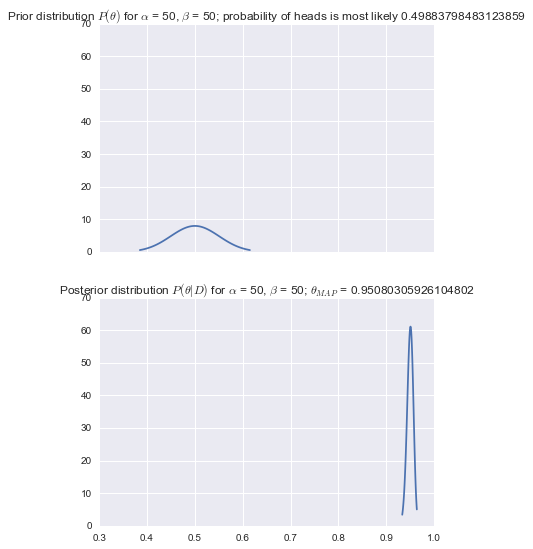

In [1]:
# setup
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from ipywidgets import interact

def prior_and_posterior_plot(a,b):
    fig, ax = plt.subplots(2, sharex = True, sharey = True, figsize = (6,9))
    x_prior = np.linspace(beta.ppf(0.01,a,b),
                    beta.ppf(0.99,a,b),100)
    y_prior = beta.pdf(x_prior,a,b)
    max_x_prior = x_prior[y_prior.argmax()]
    ax[0].plot(x_prior,y_prior)
    ax[0].set_title(r"Prior distribution $P(\theta)$ for $\alpha$ = %r, $\beta$ = %r; probability of heads is most likely %r" %(a,b,max_x_prior))
    x_post = np.linspace(beta.ppf(0.01,a+995,b+5),
                    beta.ppf(0.99,a+995,b+5),100)
    y_post = beta.pdf(x_post,a+995,b+5)
    max_x_post = x_post[y_post.argmax()]
    ax[1].plot(x_post,y_post)
    ax[1].set_title(r"Posterior distribution $P(\theta|D)$ for $\alpha$ = %r, $\beta$ = %r; $\theta_{MAP}$ = %r" %(a,b,max_x_post))

interact(prior_and_posterior_plot, a=(1,100,1), b=(1,100,1))

> As evidenced from the example above, along the way to calculating the MAP estimate, we have to calculate the probability distribution $\mathbb{P}(\theta|D)$, which is known as the [**posterior distribution**](https://en.wikipedia.org/wiki/Posterior_probability) for $\theta$.  This distribution provides much more information than the point estimates $\theta_{MLE}$ and $\theta_{MAP}$.  In some cases, it is useful to keep all of this information and forego the cleanliness of a single point estimate.  In other cases, it could be that the mean of the posterior distribution is still another potential candidate for a point estimate of $\hat{\theta}$.

# Some Additional Notes

We begin with some terminology.  We saw above that $\mathbb{P}(D|\theta)$ was best viewed as a function of $\theta$.  The need to drive this idea homes motivates the traditional [**likelihood function**](https://en.wikipedia.org/wiki/Likelihood_function)

$$
\mathcal{L}(\theta|D) := \mathbb{P}(D|\theta),
$$

considered as a function of $\theta$, which has an important role in determining $\theta_{MLE}$ _... hence the important name (which contributes to the "L" in "MLE")!_

Likewise, we saw that taking the log of the likelihood function helped us in our calculations.  In practice, especially in our world of big data, it is important to _always_ work with the log of the likelihood function, in order to avoid [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) issues.  (We didn't do this immediately, in order to avoid obscuring the main idea behind too much notation.)